In [9]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
iris = sns.load_dataset("iris")

In [13]:
df = iris

In [16]:
feature = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [17]:
x = df.loc[:,feature]

In [15]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
y = df.loc[:,'species']


In [19]:
x = StandardScaler().fit_transform(x)

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pct = pca.fit_transform(x)

principal_df = pd.DataFrame(pct,columns=['pc1','pc2'])

finaldf= pd.concat([principal_df,df[['species']]],axis=1)

In [45]:

finaldf

,pc1,pc2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


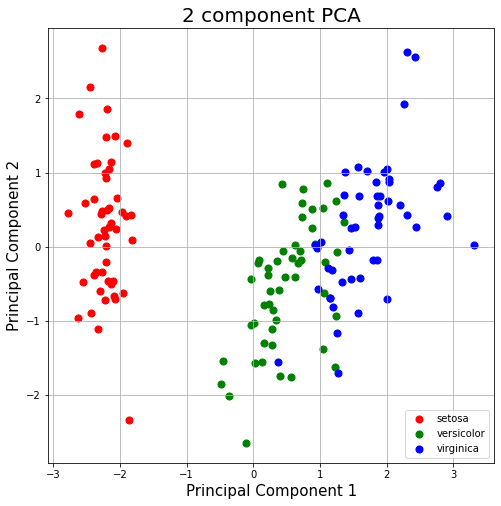

In [25]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['species'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1']
               , finaldf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [26]:

pca.explained_variance_ratio_
     

array([0.72962445, 0.22850762])

In [36]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from scipy.stats import loguniform

In [30]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [31]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
n_components = 150

print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
)

pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)


eigenfaces = pca.components_.reshape((n_components, h, w))



X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


Extracting the top 150 eigenfaces from 966 faces


In [37]:
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train_pca, y_train)

print(clf.best_estimator_)

SVC(C=12570.692725516976, class_weight='balanced', gamma=0.0006494598319325633)


                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.77      0.71        13
     Colin Powell       0.75      0.88      0.81        60
  Donald Rumsfeld       0.70      0.70      0.70        27
    George W Bush       0.91      0.88      0.90       146
Gerhard Schroeder       0.77      0.80      0.78        25
      Hugo Chavez       0.83      0.67      0.74        15
       Tony Blair       0.93      0.75      0.83        36

         accuracy                           0.83       322
        macro avg       0.79      0.78      0.78       322
     weighted avg       0.84      0.83      0.83       322



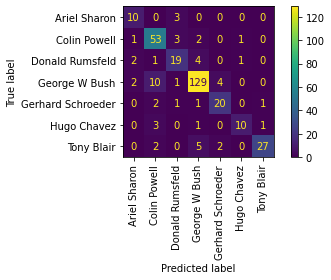

In [38]:
y_pred = clf.predict(X_test_pca)


print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

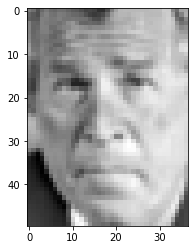

In [46]:
plt.imshow(X_test[0].reshape((h, w)), cmap=plt.cm.gray)

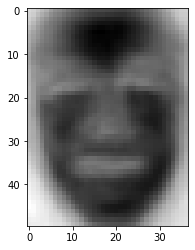

In [44]:
plt.imshow(eigenfaces[0].reshape((h, w)), cmap=plt.cm.gray)